<a href="https://colab.research.google.com/github/Alam710/facial-emotion-recognition/blob/master/Pre_trained_model_JAFFE_VGG19_x_train_y_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import libraries# Impor
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import sgd_experimental, rmsprop_v2, adam_experimental
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Define Datapath
data_path = '/content/drive/MyDrive/Tesis/JAFFE_ORIGINAL'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-surprise

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-happy

Loaded the images of dataset-sad

Loaded the images of dataset-neutral

Loaded the images of dataset-angry



(213, 224, 224, 3)

In [ ]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30 surprised
labels[30:59]=1 #29 disgust
labels[60:92]=2 #32 fear
labels[93:124]=3 #31 happy
labels[125:156]=4 #31 sad
labels[157:188]=5 #30 neutral
labels[188:]=6 #30 angry

names = ['surprise','disgust','fear','happy','sad','neutral','angry']

def getLabel(id):
    return ['surprise','disgust','fear','happy','sad','neutral','angry'][id]

In [ ]:
# convert class labels to on-hot encoding# conve
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [ ]:
"""
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Create data augmentation layer to incorporate it right into the model
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(224,
                                  224,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)"""

'\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport os\nimport PIL\nimport tensorflow as tf\n\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\nfrom tensorflow.keras.models import Sequential\n# Create data augmentation layer to incorporate it right into the model \ndata_augmentation = keras.Sequential(\n  [\n    layers.RandomFlip("horizontal",\n                      input_shape=(224,\n                                  224,\n                                  3)),\n    layers.RandomRotation(0.2),\n    layers.RandomZoom(0.2),\n  ]\n)'

In [ ]:
# Defining the model
input_shape=img_data[0].shape

model = Sequential()

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import VGG19
model = tf.keras.models.Sequential([
  #  data_augmentation,
    VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3))),
    # tf.keras.layers.Dropout(0.4),

   # tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 33,003,079
Trainable params: 12,978,695
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
#Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint
weightpath = "model"
checkpoints = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callback_list = [checkpoints]

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
# TensorBoard Callbacks
callbacks = TensorBoard(log_dir='./Graph')

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.99):
      print("\nAkurasi telah mencapai > 99%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
def print_time_taken(start_time, end_time):
    secs_elapsed = end_time - start_time

    SECS_PER_MIN = 60
    SECS_PER_HR  = 60 * SECS_PER_MIN

    hrs_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_HR)
    mins_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_MIN)

    if hrs_elapsed > 0:
        print('Time taken: %d hrs %d mins %d secs' % (hrs_elapsed, mins_elapsed, secs_elapsed))
    elif mins_elapsed > 0:
        print('Time taken: %d mins %d secs' % (mins_elapsed, secs_elapsed))
    elif secs_elapsed > 1:
        print('Time taken: %d secs' % (secs_elapsed))
    else:
        print('Time taken - less than 1 sec')


In [ ]:
# train
import sys, time
start_time = time.time()

hist = model.fit(X_train,
                 y_train,
                 batch_size=7,
                 epochs=100,
                 verbose=1,
                 validation_data=(X_test, y_test),
                 callbacks=[callbacks])


end_time = time.time()
print_time_taken(start_time, end_time)

Epoch 1/100
28/28 [==============================] - 4s 61ms/step - loss: 2.0895 - accuracy: 0.1780 - val_loss: 1.8527 - val_accuracy: 0.3182
Epoch 2/100
28/28 [==============================] - 1s 36ms/step - loss: 1.6566 - accuracy: 0.3560 - val_loss: 1.4454 - val_accuracy: 0.5455
Epoch 3/100
28/28 [==============================] - 1s 36ms/step - loss: 1.4814 - accuracy: 0.4764 - val_loss: 1.3566 - val_accuracy: 0.3636
Epoch 4/100
28/28 [==============================] - 1s 36ms/step - loss: 1.2950 - accuracy: 0.5550 - val_loss: 1.2990 - val_accuracy: 0.5000
Epoch 5/100
28/28 [==============================] - 1s 36ms/step - loss: 1.0587 - accuracy: 0.7225 - val_loss: 1.3271 - val_accuracy: 0.5000
Epoch 6/100
28/28 [==============================] - 1s 36ms/step - loss: 1.0503 - accuracy: 0.6911 - val_loss: 1.4316 - val_accuracy: 0.5455
Epoch 7/100
28/28 [==============================] - 1s 37ms/step - loss: 1.0353 - accuracy: 0.6387 - val_loss: 1.2833 - val_accuracy: 0.5455
Epoch 

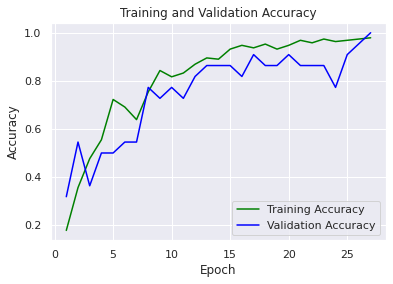

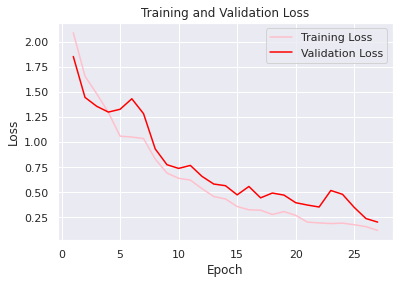

In [ ]:
# visualizing losses and accuracy
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.2026044875383377
Test accuracy: 1.0


In [ ]:
test_image = X_test[0:1]
print (test_image.shape)

(1, 224, 224, 3)


In [ ]:
print(model.predict(test_image))

[[0.00599557 0.0746353  0.03948548 0.11069471 0.40196425 0.04431726
  0.32290736]]


In [ ]:
predict_x=model.predict(test_image)
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
print(classes_x)

[4]


In [ ]:
model.save("/content/drive/MyDrive/model_save/pre-trained_model/vgg19jaffe.h5")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/model_save/pre-trained_model/vgg19jaffe.h5")

Test Loss: 0.15388037264347076
Test accuracy: 1.0
[[0.00599557 0.0746353  0.03948548 0.11069471 0.40196425 0.04431726
  0.32290736]]
[4]
[[0. 0. 0. 0. 1. 0. 0.]]


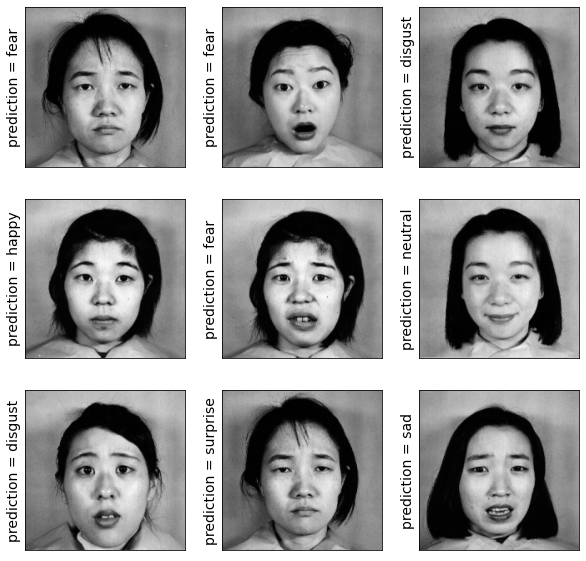

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]

print(model.predict(test_image))
print(model.predict(test_image).argmax(axis=-1))
print(y_test[0:1])

res = model.predict(X_test[9:18]).argmax(axis=-1)
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
preds_probs = model.predict(X_test, verbose=1)

2/2 [==============================] - 0s 92ms/step


In [ ]:
preds_probs[:10]

array([[5.9955269e-03, 7.4634746e-02, 3.9485320e-02, 1.1069390e-01,
        4.0196672e-01, 4.4317003e-02, 3.2290673e-01],
       [8.8409013e-01, 4.6135769e-03, 1.0461901e-01, 2.2785471e-06,
        2.0458180e-04, 6.2859841e-03, 1.8435580e-04],
       [3.4329919e-03, 6.0288501e-03, 2.1413013e-02, 1.8583763e-02,
        1.7595030e-02, 9.3215132e-01, 7.9496665e-04],
       [3.2226190e-03, 2.3049454e-03, 2.6366669e-03, 1.0433522e-02,
        6.4071871e-02, 8.5594904e-01, 6.1381284e-02],
       [5.0169200e-04, 1.0111683e-01, 8.5511571e-01, 3.9016724e-02,
        2.8661231e-03, 8.2476588e-04, 5.5804994e-04],
       [3.6356004e-04, 3.0001277e-01, 1.6106144e-02, 4.7543621e-01,
        1.3360263e-01, 5.9183978e-02, 1.5294748e-02],
       [2.3477644e-02, 1.2611657e-02, 8.7509906e-01, 7.9064984e-03,
        3.8781933e-02, 4.1634828e-02, 4.8831216e-04],
       [2.0587877e-03, 3.7568949e-02, 9.1086552e-03, 8.2313038e-02,
        6.9143271e-01, 3.2859318e-02, 1.4465858e-01],
       [4.7807870e-04, 5

In [ ]:
# We get one prediction probability per class (in our case there's 101 prediction probabilities)
print(f"Number of prediction probabilities for sample 0: {len(preds_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {preds_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 7
What prediction probability sample 0 looks like:
 [0.00599553 0.07463475 0.03948532 0.1106939  0.40196672 0.044317
 0.32290673]
The class with the highest predicted probability by the model for sample 0: 4


In [ ]:
len(preds_probs)

43

In [ ]:
preds_probs.shape

(43, 7)

In [ ]:
# What does the first prediction probability array look like?
preds_probs[0], len(preds_probs[0]), sum(preds_probs[0])

(array([0.00599553, 0.07463475, 0.03948532, 0.1106939 , 0.40196672,
        0.044317  , 0.32290673], dtype=float32), 7, 0.9999999515712261)

In [ ]:
# Get the pred classes of each label
pred_classes = preds_probs.argmax(axis=1)

In [ ]:
# How to they look?
pred_classes[:7]

array([4, 0, 5, 5, 2, 3, 2])

In [ ]:
# How many pred classes do we have?
len(pred_classes)

43

In [ ]:
#import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
y_test.shape, preds_probs.shape

((43, 7), (43, 7))

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
preds_probs.shape , y_test.shape

((43, 7), (43,))

In [ ]:
y_test.shape

(43,)

In [ ]:
preds_probs.shape

(43, 7)

In [ ]:
preds_probs = np.argmax(preds_probs, axis=1)
preds_probs.shape

(43,)

In [ ]:
print(metrics.accuracy_score(y_test, preds_probs))

1.0


In [ ]:
print(classification_report(y_test, preds_probs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         1

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


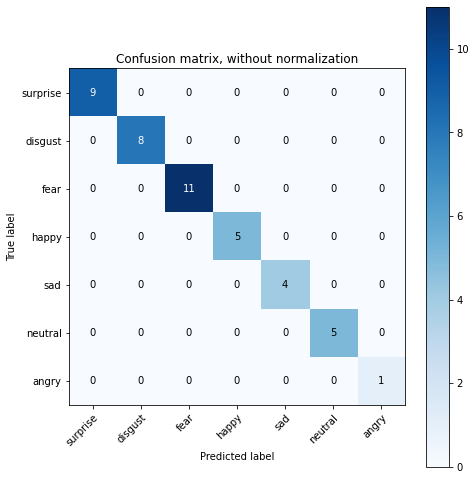

In [ ]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_test, preds_probs)
class_names=['surprise', 'disgust', 'fear', 'happy', 'sad', 'neutral', 'angry']
# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_test, preds_probs, classes = class_names, title='Confusion matrix, without normalization')

Normalized confusion matrix


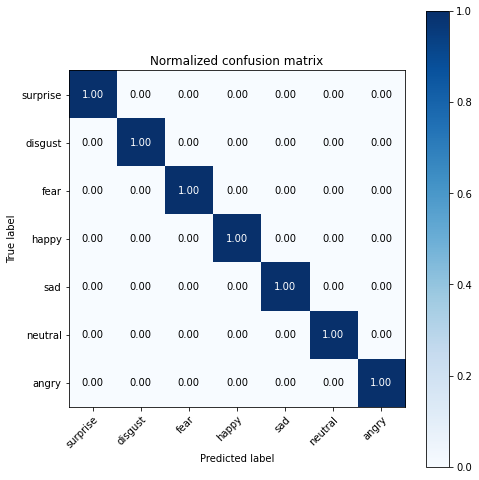

In [ ]:
#Plotting normalized confusion matrix
plot_confusion_matrix(y_test, preds_probs, classes = class_names, normalize = True, title = 'Normalized confusion matrix')